In [1]:
from datetime import datetime
from pandas import read_table, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ttide
from ttide.t_tide import t_tide
from ttide import t_predic


In [2]:
obs = pd.read_csv('Datos_Bucalemu.txt',delimiter="\t")
obs.head()

,Time (UTC),prs(m),rad(m)
0,2019-09-01 00:00:29,2.156,3.157
1,2019-09-01 00:01:29,2.079,3.080
2,2019-09-01 00:02:29,2.195,3.197
3,2019-09-01 00:03:29,2.221,3.223
4,2019-09-01 00:04:29,2.112,3.113


## Codigo para cambiar estilo de fecha columnas separadas.

In [3]:
#dtime = []
#for i in range (len(obs)):
#    year = obs['year'][i]
#    month = obs['month'][i]
#    day = obs['day'][i]
#    hour = obs['hour'][i]
#    minu = obs['min'][i]
#    dt = datetime(year, month,day, hour,minu)
#    dt = pd.to_datetime(dt)
#    dtime.append(dt)
    
#obs['datetime']=dtime


## Convertir fecha a formato datetime

In [4]:
obs['datetime']= pd.to_datetime(obs["Time (UTC)"])
indexobs = obs["datetime"]
elev = list(obs["prs(m)"])
obs = pd.DataFrame(data = {'elev':elev}, index= indexobs)

In [5]:
obs

,elev
datetime,
2019-09-01 00:00:29,2.156
2019-09-01 00:01:29,2.079
2019-09-01 00:02:29,2.195
2019-09-01 00:03:29,2.221
2019-09-01 00:04:29,2.112
...,...
2019-09-30 23:55:29,2.291
2019-09-30 23:56:29,2.186
2019-09-30 23:57:29,2.285


## Promedios horarios

In [6]:
obs = obs.resample('H').mean()

/home/lenovio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


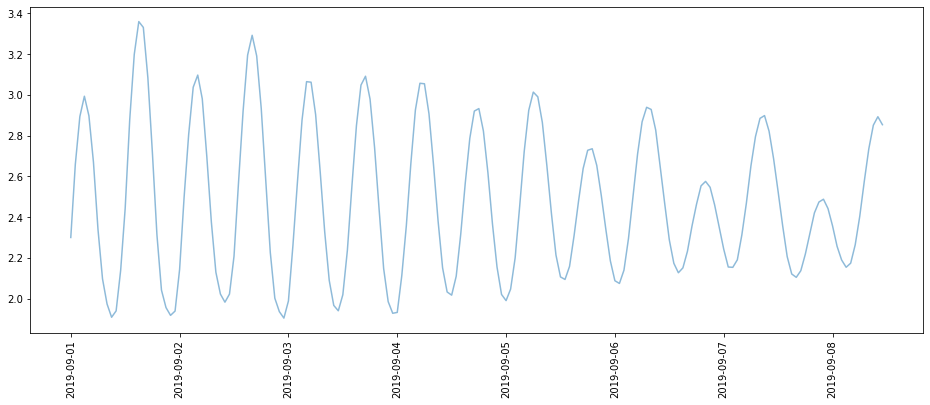

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(obs.index[0:180], obs['elev'][0:180], alpha=0.5)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
obs.describe()

,elev
count,719.000000
mean,2.462791
std,0.355631
min,1.871783
25%,2.161183
50%,2.417350
75%,2.745017
max,3.360167


In [9]:
dti = pd.date_range('2019-11-28', periods=30*24+1, freq='2T')
dti = dti.tolist()
dti = np.array(dti)

dti2 = obs.index.tolist()
dti2 = np.array(dti2)

In [10]:

LatV = -34.639379
out_tide_V= t_tide(obs['elev'], dt=1,stime=dti2[0] ,lat=LatV)

-----------------------------------
nobs = 720 
ngood = 718 
record length (days) = 30.00
start time: 2019-09-01 00:00:00
rayleigh criterion = 1.0

Greenwich phase computed with nodal
                   corrections applied to amplitude
                   and phase relative to center time

x0= 2.46  xtrend= 0
var(data)= 0.13    var(prediction)= 0.12    var(residual)= 0.01
var(prediction)/var(data) (%) = 94.5

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
  MSF   0.0028219     0.0348     0.051     13.24    112.83      0.47
  2Q1   0.0357064     0.0042     0.006     64.04     92.90       0.5
* Q1    0.0372185     0.0226     0.007    344.81     17.75        11
* O1    0.0387307     0.0963     0.007    351.82      4.25   1.8e+02
* NO1   0.0402686     0.0174     0.006    352.83     17.69       9.5
* K1    0.0417807     0.1113     0.007     48.22      3.49   2.6e+02
  J1    0.0432929     0.0097     0.007    101.89   

/home/lenovio/Tarea4_maritima/ttide/t_tide.py:295: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef = np.linalg.lstsq(tc[gd, :], xin[gd])[0].T
/home/lenovio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/numpy/lib/type_check.py:161: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real
/home/lenovio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/numpy/lib/type_check.py:204: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  return val.imag
/home/lenovio/Tarea

In [11]:
valores = out_tide_V['tidecon']
names2 = out_tide_V['nameu']
names = ['MSF', '2Q1', 'Q1', 'O1', 'NO1', 'K1', 'J1', 'OO1',
       'UPS1', 'N2', 'M2', 'S2', 'ETA2', 'MO3', 'M3', 'MK3',
       'SK3', 'MN4', 'M4', 'MS4', 'S4', '2MK5', '2SK5', '2MN6',
       'M6', '2MS6', '2SM6', '3MK7', 'M8']
variables = ['amp','amp-err','pha','pha-err']
freq = out_tide_V['fu']
noise = out_tide_V['snr']

result_tide= pd.DataFrame(data =valores, index = names, columns = variables)
result_tide['freq']= freq
result_tide['snr']= noise

result_tide

,amp,amp-err,pha,pha-err,freq,snr
MSF,0.034790,0.050853,13.243280,112.828730,0.002822,0.468026
2Q1,0.004233,0.005971,64.043283,92.897572,0.035706,0.502509
Q1,0.022575,0.006886,344.814576,17.754293,0.037219,10.747691
O1,0.096302,0.007183,351.824301,4.254091,0.038731,179.757980
NO1,0.017358,0.005630,352.826107,17.691051,0.040269,9.507113
K1,0.111286,0.006870,48.216706,3.494349,0.041781,262.415316
J1,0.009719,0.006989,101.885675,43.348039,0.043293,1.933626
OO1,0.006659,0.006568,118.194737,65.541009,0.044831,1.027962
UPS1,0.006601,0.007547,177.765693,67.852961,0.046343,0.764908
N2,0.097859,0.019467,21.040344,10.622171,0.078999,25.271217


In [12]:
t = np.linspace(720*2+28*24,720*2+29*24 -1,24*30)
a0 = 2.462791

In [13]:
M2 =  result_tide['amp']['M2']*np.cos(2*np.pi*result_tide['freq']['M2']*t-result_tide['pha']['M2'])
S2 =  result_tide['amp']['S2']*np.cos(2*np.pi*result_tide['freq']['S2']*t-result_tide['pha']['S2'])
K1 =  result_tide['amp']['K1']*np.cos(2*np.pi*result_tide['freq']['K1']*t-result_tide['pha']['K1'])
O1 =  result_tide['amp']['O1']*np.cos(2*np.pi*result_tide['freq']['O1']*t-result_tide['pha']['O1'])
N2 =  result_tide['amp']['N2']*np.cos(2*np.pi*result_tide['freq']['N2']*t-result_tide['pha']['N2'])
M3 =  result_tide['amp']['M3']*np.cos(2*np.pi*result_tide['freq']['M3']*t-result_tide['pha']['M3'])
Q1 =  result_tide['amp']['Q1']*np.cos(2*np.pi*result_tide['freq']['Q1']*t-result_tide['pha']['Q1'])
SK3 = result_tide['amp']['SK3']*np.cos(2*np.pi*result_tide['freq']['SK3']*t-result_tide['pha']['SK3'])


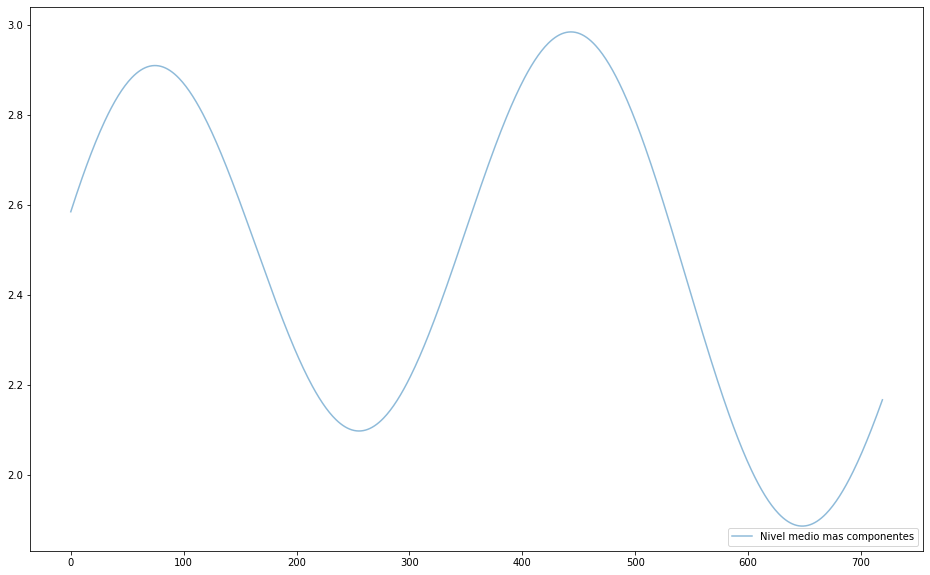

In [14]:
fig, ( ax3) = plt.subplots(nrows=1, sharey=True, sharex=True, figsize=(16, 10))


ax3.plot( (M2+S2+K1+O1*N2+M3+Q1+SK3)+a0, alpha=0.5, label=u'Nivel medio mas componentes')
_ = ax3.legend(numpoints=1, loc='lower right')



# Se cargan los registros reales para SA 28 Noviembre, 2019

In [15]:
san_a = pd.read_csv('Datos_SA_28N.txt',delimiter="\t")
san_a['datetime']= pd.to_datetime(san_a["Time (UTC)"])
indexobs = san_a["datetime"]
elev = list(san_a["prs(m)"])
san_a = pd.DataFrame(data = {'elev':elev}, index= indexobs)
san_a = san_a.resample('2T').mean()
san_a.head()

,elev
datetime,
2019-11-28 00:00:00,2.3235
2019-11-28 00:02:00,2.3550
2019-11-28 00:04:00,2.3485
2019-11-28 00:06:00,2.3745
2019-11-28 00:08:00,2.3795


## Se cargan los registros reales para Bucalemu 28 Noviembre, 2019

In [16]:
buca = pd.read_csv('Bucalemu28N.txt',delimiter="\t")
buca['datetime']= pd.to_datetime(buca["Time (UTC)"])
indexobs = buca["datetime"]
elev = list(buca["prs(m)"])
buca = pd.DataFrame(data = {'elev':elev}, index= indexobs)
buca = buca.resample('2T').mean()
buca.head()

,elev
datetime,
2019-11-28 00:00:00,2.6965
2019-11-28 00:02:00,2.7495
2019-11-28 00:04:00,2.7595
2019-11-28 00:06:00,2.7815
2019-11-28 00:08:00,2.7290


## Pronostico T_TIDE

In [25]:
t_time  = dti
names = names2
freq = freq
tidecon = valores
pred_buca = t_predic(t_time,names,freq,tidecon)
# Definición diccionario:
diccionario = {'pred_buca': pred_buca}

# Creación DataFrame:
pred_buca = pd.DataFrame(diccionario,index=t_time)

# Guarda datos en CSV:
pred_buca.to_csv('Pronostico_Bucalemu28N.csv')

In [18]:
pred2 = t_predic(dti2,names,freq,tidecon)

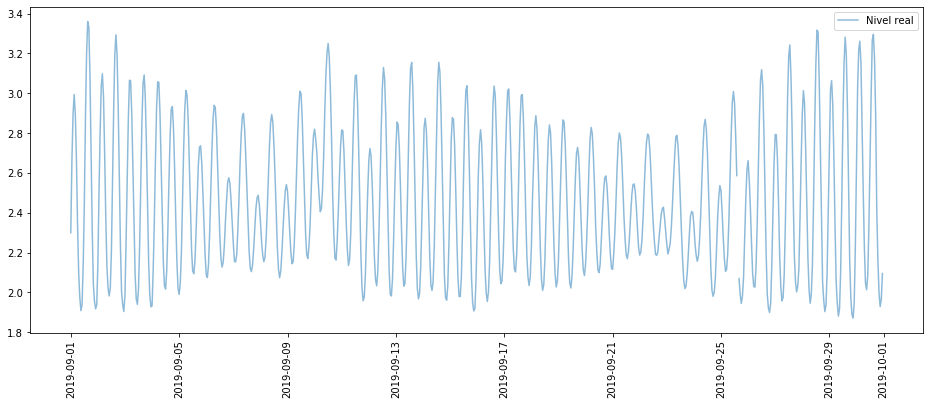

In [19]:
fig, (ax4) = plt.subplots(nrows=1, sharey=True, sharex=True, figsize=(16, 6))

ax4.plot(obs.index,  obs['elev'], alpha=0.5, label=u'Nivel real')
_ = ax4.legend(numpoints=1, loc='upper right')
plt.xticks(rotation='vertical')
plt.show()



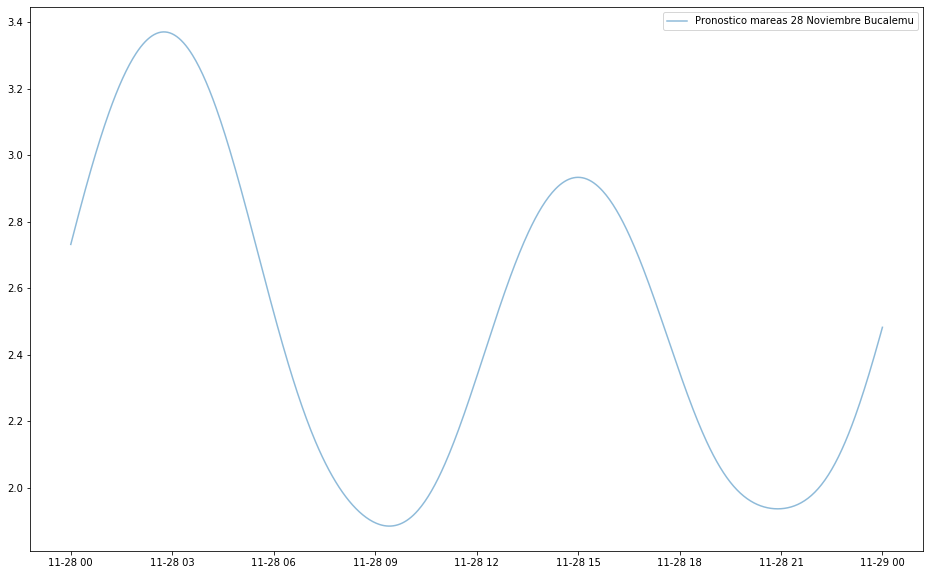

In [20]:
fig, (ax0) = plt.subplots(nrows=1, sharey=True, sharex=True, figsize=(16, 10))

ax0.plot( dti,pred_buca+a0, alpha=0.5, label=u'Pronostico mareas 28 Noviembre Bucalemu')
_ = ax0.legend(numpoints=1, loc='upper right')
plt.show()

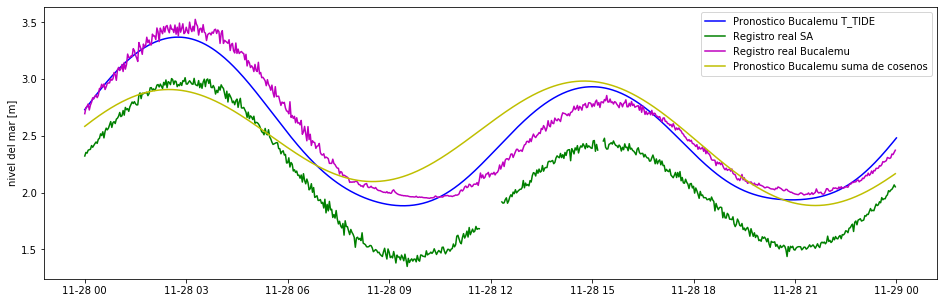

In [21]:
plt.rcParams["figure.figsize"] = [16,5]
plt.plot(dti,pred_buca+a0,'b',label='Pronostico Bucalemu T_TIDE')
plt.plot(san_a.index,san_a['elev'],'g',label='Registro real SA')
plt.plot(buca.index,buca['elev'],'m',label='Registro real Bucalemu')
plt.plot(san_a.index,(M2+S2+K1+O1*N2+M3+Q1+SK3)+a0,'y',label='Pronostico Bucalemu suma de cosenos')
plt.legend(loc='upper right')
plt.ylabel('nivel del mar [m]')
plt.show()
